<a href="https://colab.research.google.com/github/Elsacred02/assignment_2_advanced_machine_learning/blob/main/Problema1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

%matplotlib inline

In [26]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [27]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")


X_train /= 255
X_test /= 255


Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [28]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [29]:
print('Size of the train set:', X_train.shape)

Size of the train set: (45000, 784)


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

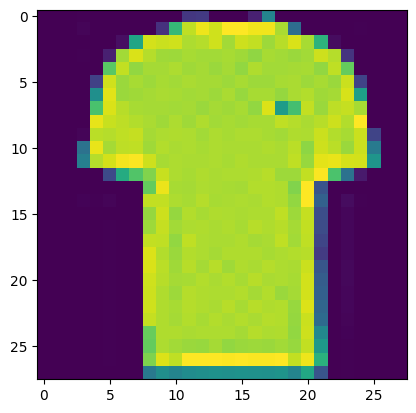

In [30]:
X_train

plt.imshow(X_val[0].reshape(28, 28))
Y_val[0]

In [31]:
dims = X_train.shape[1]

nb_classes = 10

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(nb_classes, activation = "softmax"))

optimizer = keras.optimizers.Adam(learning_rate= 0.1)

model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577,178 (2.20 MB)

 Trainable params: 577,178 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
n_epochs = 10
network_history = model.fit(X_train, Y_train, batch_size=128,
                            epochs=n_epochs, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/10
352/352 - 8s - 22ms/step - accuracy: 0.1622 - loss: 2.2531 - val_accuracy: 0.2090 - val_loss: 2.1920
Epoch 2/10
352/352 - 4s - 13ms/step - accuracy: 0.2415 - loss: 2.1268 - val_accuracy: 0.2870 - val_loss: 2.0509
Epoch 3/10
352/352 - 6s - 18ms/step - accuracy: 0.3161 - loss: 1.9735 - val_accuracy: 0.3771 - val_loss: 1.8771
Epoch 4/10
352/352 - 5s - 14ms/step - accuracy: 0.4327 - loss: 1.7869 - val_accuracy: 0.4855 - val_loss: 1.6775
Epoch 5/10


In [ ]:
def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

plot_loss(network_history)
plot_accuracy(network_history)